<a href="https://colab.research.google.com/github/kushal0705/SBS_Basic_Banking_Sytem/blob/main/TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation - Data Science & Business Analytics Internship**

#  TASK 2 - Prediction using Unsupervised Machine Learning

The task is to predict the optimum number of clusters from the 'Iris' dataset and represent it visually.

Steps to be followed:

Step 1 - Importing the dataset

Step 2 - Finding the optimum number of clusters


Step 3 - Applying k means clustering on the data


Step 4 - Visualising the clusters



# **STEP-1 Importing the data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

In [3]:
dataset=pd.read_csv("Iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset = datasets.load_iris()
dataset = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [5]:
dataset.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **STEP-2 Finding the optimum number of clusters**

We must state how many clusters there are. Before using kmeans to cluster the data, Several techniques, such the Elbow approach and the Silhouette Coefficient, are available to determine the smallest number of clusters. The elbow technique is applied here.

**Silhouette Coefficient:** The separation distance between the generated clusters can be investigated using silhouette analysis. The silhouette plot offers a visual approach to evaluate factors like the number of clusters by displaying a measure of how close each point in one cluster is to points in the neighbouring clusters. The range of this measurement is [-1, 1].

**Elbow Method:** This approach allows for a given range of cluster counts. Within-cluster sum of square (wss) values are computed for each number and kept in a list. These values are then shown against the previously utilised range of cluster counts. The location of the bend in the second-dimensional figure shows the proper amount of clusters.

In [7]:
x = dataset.iloc[:, [0, 1, 2, 3]].values


within_cluster_sum_of_square = []

clusters_range = range(1,11)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    within_cluster_sum_of_square.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

<ipython-input-8-71681027f531>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(clusters_range, within_cluster_sum_of_square, 'go-', color='green')


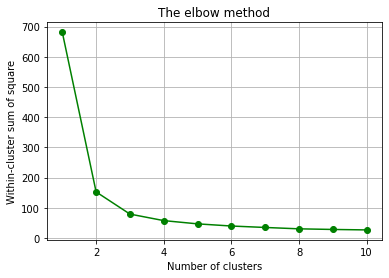

In [8]:
plt.plot(clusters_range, within_cluster_sum_of_square, 'go-', color='green')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

# **STEP-3 Applying k means clustering on the data**

In [9]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(dataset)

In [10]:
x = dataset.iloc[:, [0, 1, 2, 3]].values

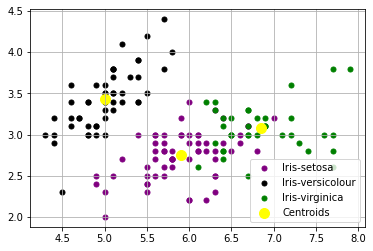

In [14]:
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'black', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'green', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()

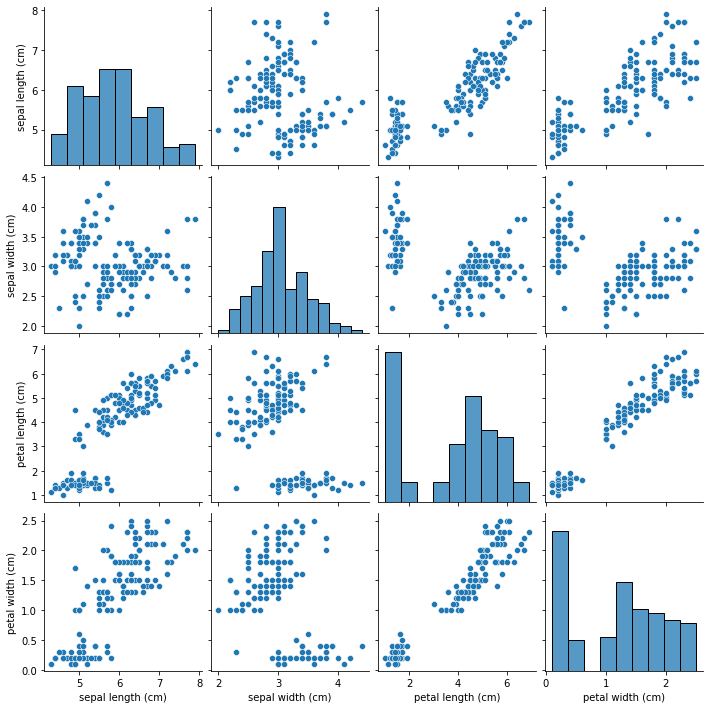

In [21]:
sns.pairplot(dataset,hue=None)

<Axes: >

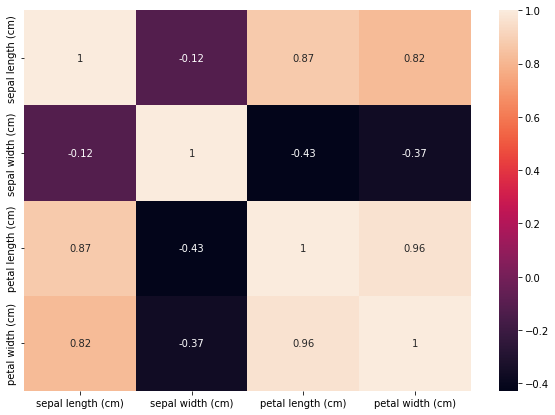

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(), annot=True)